In [66]:
import rat, ROOT
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import jp_mpl as jplot

In [67]:
import os, sys

In [79]:
basedir = '/home/jpyanez/snoplus/data/laserball_soc'
#fname_original = os.path.join(basedir, 'SNOP_0000100556_noq.root')
#fname_pmtcuts  = os.path.join(basedir, 'SNOP_0000100556_pmtq.root')
fname_original = os.path.join(basedir, 'SNOP_0000100556_newSOC_v2.root')
fname_pmtcuts  = os.path.join(basedir, 'SNOP_0000100556_newSOC_v0.root')

In [80]:
oreader = rat.socreader(fname_original)
nreader = rat.socreader(fname_pmtcuts)

In [81]:
osoc, orun = oreader.next()

In [82]:
nsoc, nrun = nreader.next()

In [83]:
opmts = np.array(osoc.GetSOCPMTIDs())
npmts = np.array(nsoc.GetSOCPMTIDs())

In [84]:
o_occ = np.zeros(len(opmts))
n_occ = np.zeros(len(npmts))
on_occ = np.zeros(len(npmts))

In [85]:
iNew = 0
for iOld, one_pmt in enumerate(opmts):
    o_occ[iOld] = osoc.GetSOCPMT(one_pmt).GetPromptOccupancy()
    if one_pmt in npmts:
        n_occ[iNew] = nsoc.GetSOCPMT(one_pmt).GetPromptOccupancy()
        on_occ[iNew] = o_occ[iOld]
        iNew += 1

In [86]:
print 'Total number of pmts: No cuts, with cuts'
len(opmts), len(npmts), len(npmts)*1./len(opmts)

Total number of pmts: No cuts, with cuts


(9195, 8465, 0.9206090266449157)

/gs/software/CentOS-6/eb/software/Toolchain/iomkl/2015b/IPython/3.2.1-Python-2.7.10/lib/python2.7/site-packages/IPython/kernel/__main__.py:15: RuntimeWarning: invalid value encountered in divide


(0, 2)

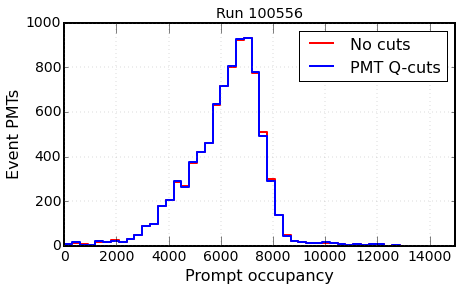

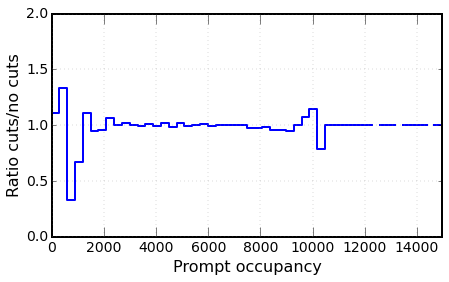

In [87]:
# Occupancy before, after cuts
plt.figure(figsize=(7,4))
xedges = np.linspace(0, o_occ.max(), 51)
nold, x = np.histogram(o_occ, xedges)
nnew, x = np.histogram(n_occ, xedges)
jplot.unfilledBar(xedges, nold, color = 'red', label = 'No cuts')
jplot.unfilledBar(xedges, nnew, color = 'blue', label = 'PMT Q-cuts')
plt.xlabel('Prompt occupancy', fontsize=16)
plt.ylabel('Event PMTs', fontsize=16)
plt.legend(loc=0, fontsize=16)
plt.title('Run 100556', fontsize='x-large')


plt.figure(figsize=(7,4))
jplot.unfilledBar(xedges, nnew*1./nold)
plt.ylabel("Ratio cuts/no cuts", fontsize=16)
plt.legend(loc=0, fontsize=16)
plt.xlabel('Prompt occupancy', fontsize=16)
plt.ylim(0,2)

No difference 1029  - Different 6660


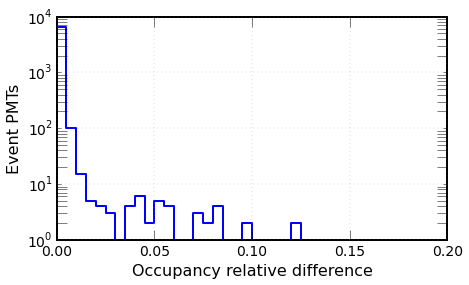

In [88]:
# Difference in occupancy
plt.figure(figsize=(7,4))
occdiff = (on_occ - n_occ)*1./on_occ
print 'No difference', np.sum(occdiff==0), ' - Different', len(occdiff[occdiff>0])
xedges = np.linspace(0,0.2, 41)
n, x = np.histogram(occdiff[occdiff>0], xedges)
jplot.unfilledBar(xedges, n)
plt.xlabel('Occupancy relative difference', fontsize=16)
plt.ylabel('Event PMTs', fontsize=16)
plt.yscale('log')

In [89]:
print np.array(osoc.GetFitResult(osoc.GetFitNames()[0]).GetVertex(0).GetPosition())
print np.array(nsoc.GetFitResult(nsoc.GetFitNames()[0]).GetVertex(0).GetPosition())

[  -2.49525952 -220.97467041   17.34860802]
[  -2.4644165  -221.03012085   17.10269928]
